In [4]:
import os

from matplotlib import pyplot as plt
from scipy import stats

import numpy as np
import pandas as pd

from tqdm.auto import tqdm

from foldingdiff import vdw_clashes
from foldingdiff import plotting

In [5]:
PLOT_DIR = os.path.join(plotting.PLOT_DIR, 'relaxation')
assert os.path.isdir(PLOT_DIR)

In [6]:
relax_tm_scores = pd.read_csv(
    "/home/wukevin/projects/protdiff_results/generation-random-seed-reps/generation_seed_7344/sampled_pdb_grafted_relaxed/relaxation_tmscores.csv",
)
relax_tm_scores['generation'] = [
    '_'.join(os.path.basename(x).split("_")[:2]) for x in relax_tm_scores['query']
]
relax_tm_scores

,query,tmscore,matching,generation
0,sampled_pdb_grafted_relaxed/generated_0_protei...,0.56371,sampled_pdb_with_o/generated_0.pdb,generated_0
1,sampled_pdb_grafted_relaxed/generated_0_protei...,0.59564,sampled_pdb_with_o/generated_0.pdb,generated_0
2,sampled_pdb_grafted_relaxed/generated_0_protei...,0.65028,sampled_pdb_with_o/generated_0.pdb,generated_0
3,sampled_pdb_grafted_relaxed/generated_0_protei...,0.55515,sampled_pdb_with_o/generated_0.pdb,generated_0
4,sampled_pdb_grafted_relaxed/generated_0_protei...,0.60347,sampled_pdb_with_o/generated_0.pdb,generated_0
...,...,...,...,...
6235,sampled_pdb_grafted_relaxed/generated_9_protei...,0.47471,sampled_pdb_with_o/generated_9.pdb,generated_9
6236,sampled_pdb_grafted_relaxed/generated_9_protei...,0.69624,sampled_pdb_with_o/generated_9.pdb,generated_9
6237,sampled_pdb_grafted_relaxed/generated_9_protei...,0.62743,sampled_pdb_with_o/generated_9.pdb,generated_9
6238,sampled_pdb_grafted_relaxed/generated_9_protei...,0.47009,sampled_pdb_with_o/generated_9.pdb,generated_9


In [7]:
relax_tm_scores_per_generation = pd.DataFrame(
    index=sorted(relax_tm_scores['generation'].unique(), key=lambda x: int(x.split("_")[1])),
    columns=['query', 'tmscore', 'matching'],
)
relax_tm_scores_per_generation.tmscore = -np.inf

for _, row in relax_tm_scores.iterrows():
    if row.tmscore > relax_tm_scores_per_generation.loc[row.generation].tmscore:
        relax_tm_scores_per_generation.loc[row.generation] = row
assert ~np.any(relax_tm_scores_per_generation.tmscore <= 0.0)

relax_tm_scores_per_generation

,query,tmscore,matching
generated_0,sampled_pdb_grafted_relaxed/generated_0_protei...,0.69143,sampled_pdb_with_o/generated_0.pdb
generated_1,sampled_pdb_grafted_relaxed/generated_1_protei...,0.67994,sampled_pdb_with_o/generated_1.pdb
generated_2,sampled_pdb_grafted_relaxed/generated_2_protei...,0.78492,sampled_pdb_with_o/generated_2.pdb
generated_3,sampled_pdb_grafted_relaxed/generated_3_protei...,0.62794,sampled_pdb_with_o/generated_3.pdb
generated_4,sampled_pdb_grafted_relaxed/generated_4_protei...,0.42117,sampled_pdb_with_o/generated_4.pdb
...,...,...,...
generated_775,sampled_pdb_grafted_relaxed/generated_775_prot...,0.35227,sampled_pdb_with_o/generated_775.pdb
generated_776,sampled_pdb_grafted_relaxed/generated_776_prot...,0.39093,sampled_pdb_with_o/generated_776.pdb
generated_777,sampled_pdb_grafted_relaxed/generated_777_prot...,0.36144,sampled_pdb_with_o/generated_777.pdb
generated_778,sampled_pdb_grafted_relaxed/generated_778_prot...,0.49257,sampled_pdb_with_o/generated_778.pdb


In [8]:
relax_tm_scores_per_generation['clashes'] = [
    vdw_clashes.count_clashes(
        os.path.join("/home/wukevin/projects/protdiff_results/generation-random-seed-reps/generation_seed_7344", x)
    )
    for x in tqdm(relax_tm_scores_per_generation['query'])
]
relax_tm_scores_per_generation

  0%|          | 0/780 [00:00<?, ?it/s]

,query,tmscore,matching,clashes
generated_0,sampled_pdb_grafted_relaxed/generated_0_protei...,0.69143,sampled_pdb_with_o/generated_0.pdb,0
generated_1,sampled_pdb_grafted_relaxed/generated_1_protei...,0.67994,sampled_pdb_with_o/generated_1.pdb,0
generated_2,sampled_pdb_grafted_relaxed/generated_2_protei...,0.78492,sampled_pdb_with_o/generated_2.pdb,0
generated_3,sampled_pdb_grafted_relaxed/generated_3_protei...,0.62794,sampled_pdb_with_o/generated_3.pdb,0
generated_4,sampled_pdb_grafted_relaxed/generated_4_protei...,0.42117,sampled_pdb_with_o/generated_4.pdb,0
...,...,...,...,...
generated_775,sampled_pdb_grafted_relaxed/generated_775_prot...,0.35227,sampled_pdb_with_o/generated_775.pdb,0
generated_776,sampled_pdb_grafted_relaxed/generated_776_prot...,0.39093,sampled_pdb_with_o/generated_776.pdb,0
generated_777,sampled_pdb_grafted_relaxed/generated_777_prot...,0.36144,sampled_pdb_with_o/generated_777.pdb,0
generated_778,sampled_pdb_grafted_relaxed/generated_778_prot...,0.49257,sampled_pdb_with_o/generated_778.pdb,0


In [9]:
np.sum(relax_tm_scores_per_generation.tmscore >= 0.5), np.mean(relax_tm_scores_per_generation.tmscore >= 0.5)

(455, 0.5833333333333334)

In [23]:
(relax_tm_scores_per_generation.loc[
    relax_tm_scores_per_generation.tmscore >= 0.5
].clashes == 0).sum()

433

In [10]:
np.sum(relax_tm_scores_per_generation.clashes == 0)

733

In [11]:
np.mean(
    relax_tm_scores_per_generation.clashes[relax_tm_scores_per_generation.clashes > 0]
)

3.1702127659574466

In [12]:
np.mean(
    relax_tm_scores_per_generation.tmscore[relax_tm_scores_per_generation.clashes > 0]
)

0.5067340425531914

In [13]:
relaxation_tm_scores = relax_tm_scores_per_generation['tmscore'].to_dict()
next(iter(relaxation_tm_scores.items()))

('generated_0', 0.69143)

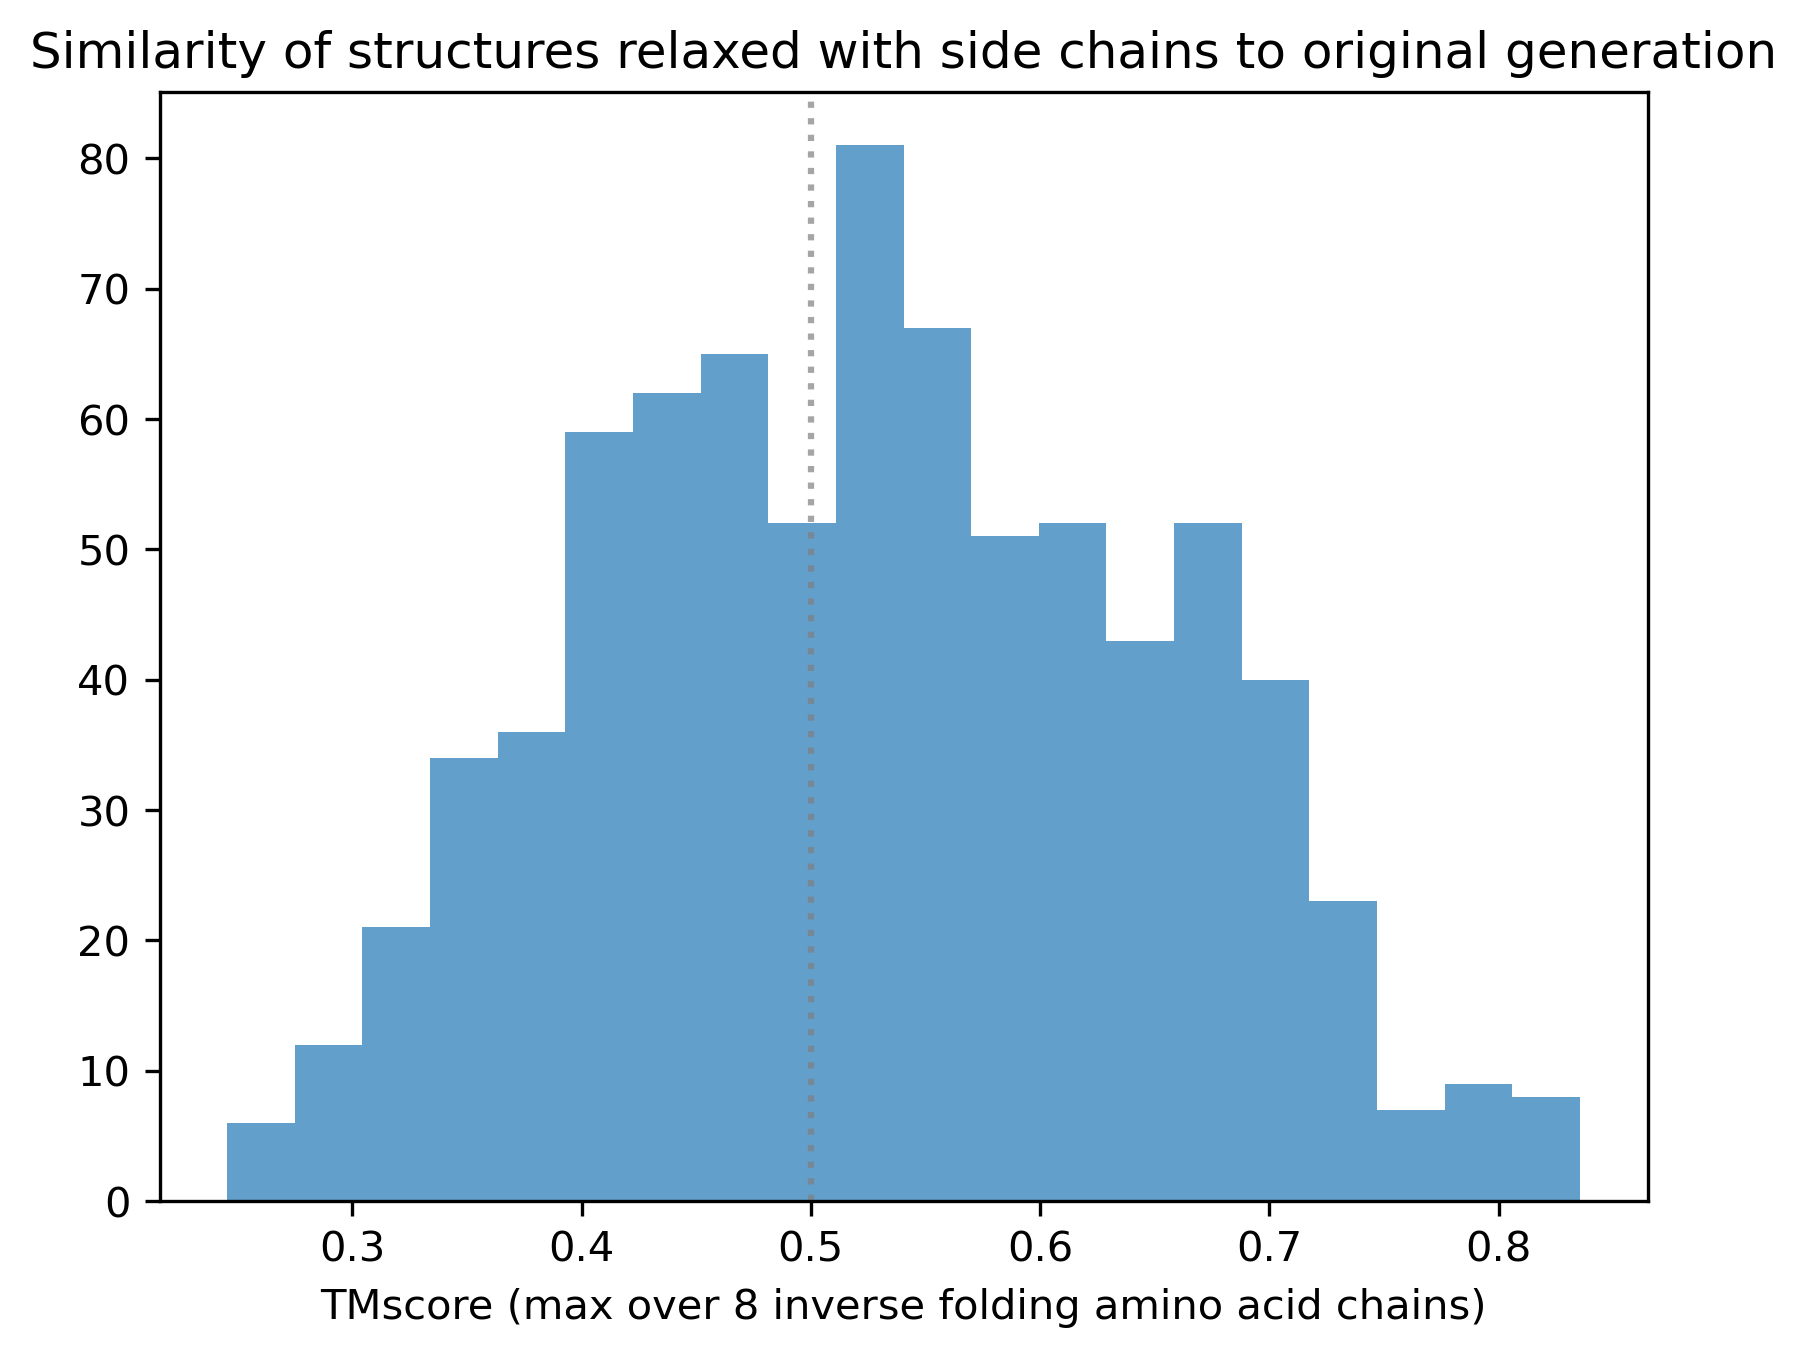

In [19]:
fig, ax = plt.subplots(dpi=300)
ax.hist(
    relax_tm_scores_per_generation['tmscore'],
    bins=20,
    alpha=0.7,
)
ax.axvline(0.5, color='tab:grey', alpha=0.7, linestyle='dotted')
ax.set(
    xlabel="TMscore (max over 8 inverse folding amino acid chains)",
    title="Similarity of structures relaxed with side chains to original generation",
)
fig.savefig(
    os.path.join(PLOT_DIR, "relaxation_tmscore_histogram.pdf"), bbox_inches='tight',
)
fig.show()

In [15]:
# Compare to scTM scores

sctm_df = pd.read_csv(
    "/home/wukevin/projects/protdiff_results/generation-random-seed-reps/generation_seed_7344/sctm_scores_proteinmpnn_tm_scores.csv",
    index_col=1,
)
sctm_df.head()

,Unnamed: 0,scTM,max training TM,length_int,alpha_counts,beta_counts,scTM best match,max training TM structure,length,designable
id,,,,,,,,,,
generated_202,0,0.39745,0.46674,70,1,3,omegafold_predictions_proteinmpnn/generated_20...,/home/wukevin/projects/protdiff/data/cath/domp...,short ($\leq 70$ aa),False
generated_414,1,0.36039,0.46756,91,2,2,omegafold_predictions_proteinmpnn/generated_41...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False
generated_309,2,0.49600,0.60337,80,4,0,omegafold_predictions_proteinmpnn/generated_30...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False
generated_529,3,0.29100,0.36524,102,0,6,omegafold_predictions_proteinmpnn/generated_52...,/home/wukevin/projects/protdiff/data/cath/domp...,long ($> 70$ aa),False
generated_194,4,0.42942,0.47160,69,3,2,omegafold_predictions_proteinmpnn/generated_19...,/home/wukevin/projects/protdiff/data/cath/domp...,short ($\leq 70$ aa),False


In [16]:
sctm_scores = sctm_df['scTM'].to_dict()
next(iter(sctm_scores.items()))

('generated_202', 0.39745)

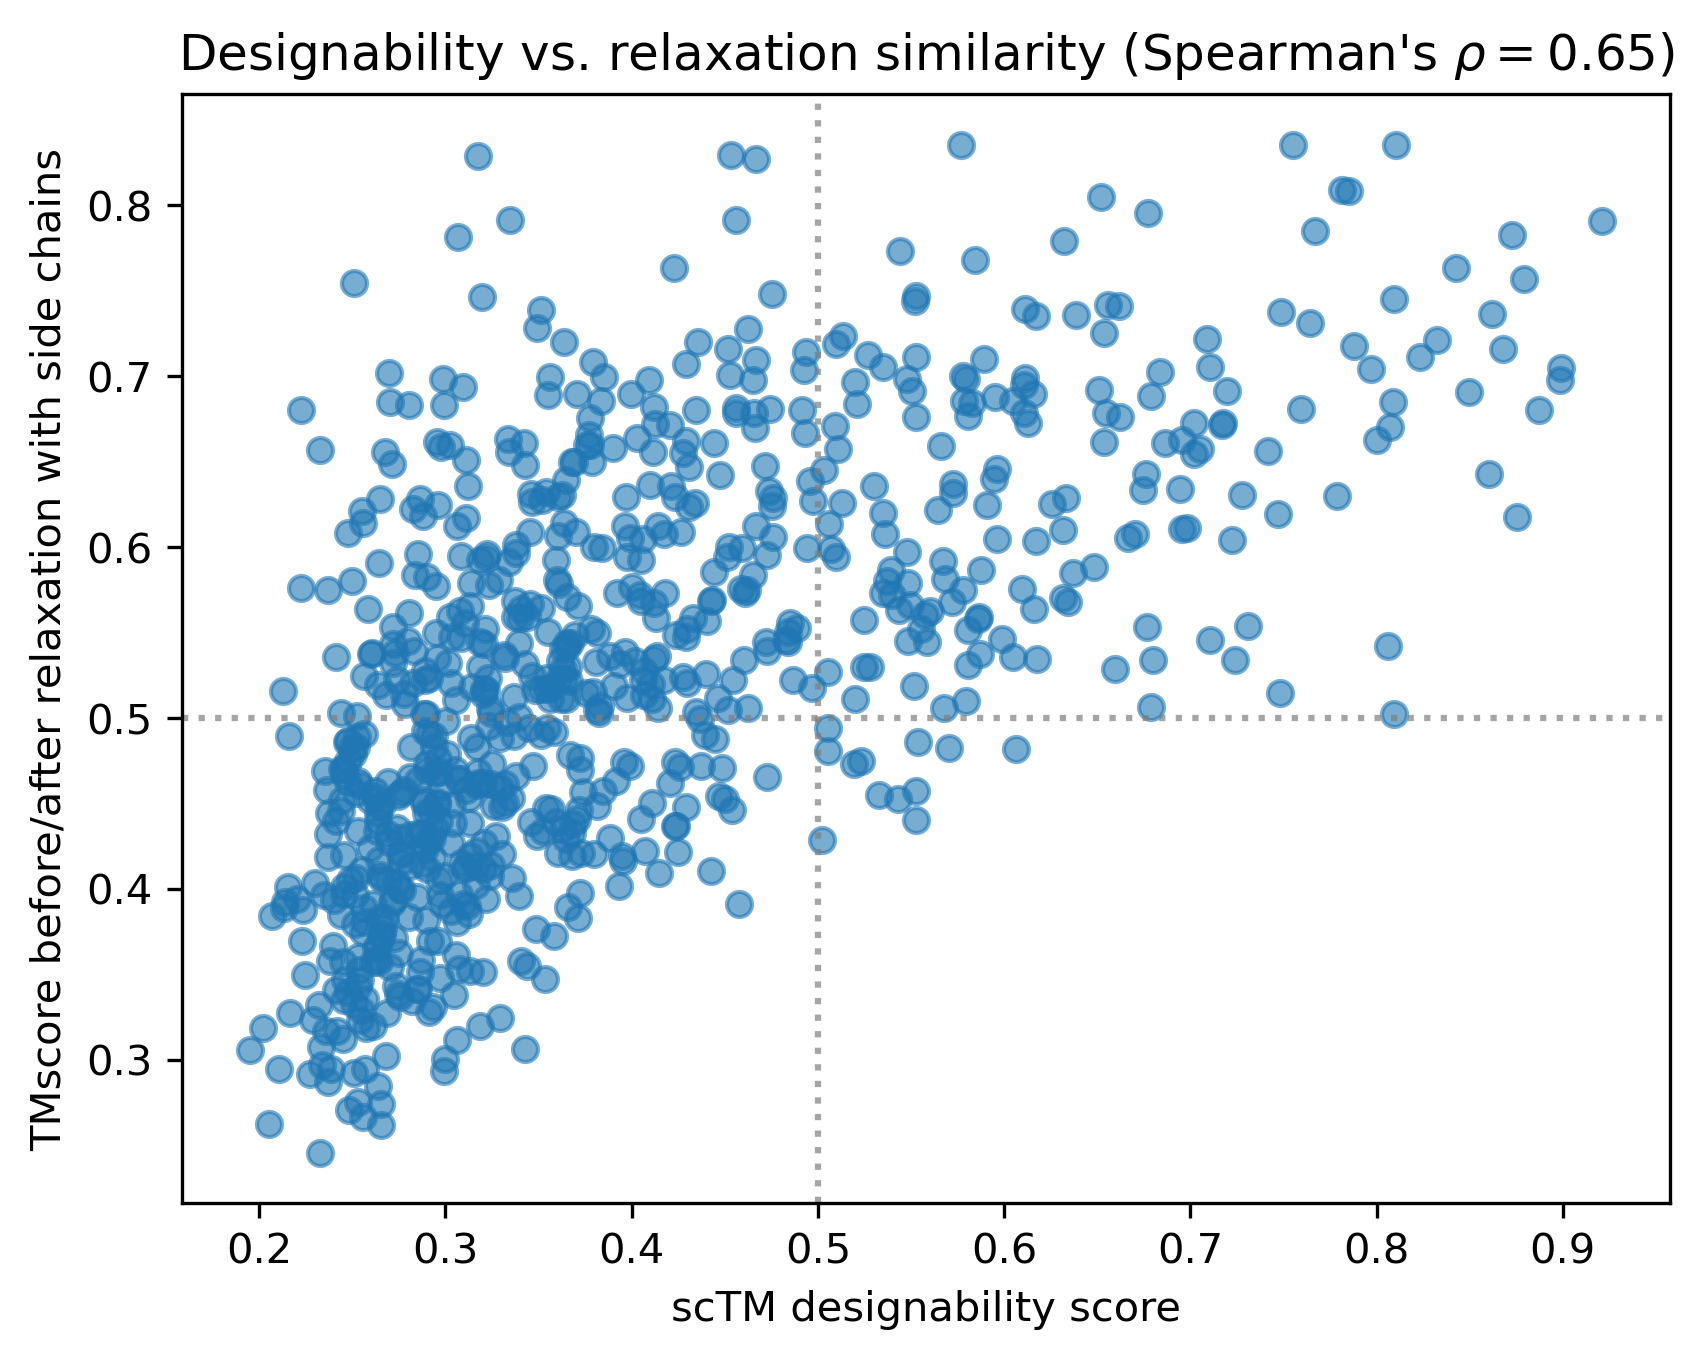

In [20]:
assert set(sctm_scores.keys()) == set(relaxation_tm_scores.keys())

stat, pval = stats.spearmanr(
    [sctm_scores[k] for k in sorted(sctm_scores.keys())],
    [relaxation_tm_scores[k] for k in sorted(sctm_scores.keys())],
)

fig, ax = plt.subplots(dpi=300)
ax.scatter(
    [sctm_scores[k] for k in sorted(sctm_scores.keys())],
    [relaxation_tm_scores[k] for k in sorted(sctm_scores.keys())],
    alpha=0.6,
)
ax.axvline(0.5, color='tab:grey', alpha=0.7, linestyle='dotted')
ax.axhline(0.5, color='tab:grey', alpha=0.7, linestyle='dotted')
ax.set(
    xlabel="scTM designability score",
    ylabel="TMscore before/after relaxation with side chains",
    title=r"Designability vs. relaxation similarity (Spearman's $\rho = {stat:.2f}$)".format(
        stat=stat,
        pval=pval,
    ),
)
fig.savefig(
    os.path.join(PLOT_DIR, "relaxation_tmscore_vs_sctm.pdf"), bbox_inches='tight',
)
fig.show()